# Fetch data from wikipedia (50 request limit)

In [6]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt


# Wikipedia API endpoint
ENDPOINT = 'https://en.wikipedia.org/w/api.php'

# Parameters for the API query, requesting the revision history of the "Climate Change" page
parameters = {
    'action': 'query',
    'format': 'json',
    'titles': 'Climate_change',
    'prop': 'revisions',
    'rvlimit': 50,  # Fetch the last 50 revisions
    'rvprop': 'ids|timestamp|user|comment|size'  # Information you want about the revisions
}


# ... [Previous code remains the same] ...

def get_revision_history():
    response = requests.get(ENDPOINT, params=parameters)
    data = response.json()

    # Extracting revisions and converting them into a DataFrame
    pages = data['query']['pages']
    for page_id in pages:
        revisions = pages[page_id].get('revisions', [])
        df = pd.DataFrame(revisions)
        return df  # Return the DataFrame instead of printing

# Fetch data
revision_data = get_revision_history()

In [8]:
revision_data.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'left')])]
)


,revid,parentid,user,timestamp,size,comment
0,1192363300,1191687558,Anteosaurus magnificus,2023-12-28T23:34:10Z,300042,
1,1191687558,1191509857,Wikipedialuva,2023-12-25T02:42:28Z,299425,"clean up, [[WP:AWB/T|typo(s) fixed]]: ’s → 's"
2,1191509857,1191500812,RCraig09,2023-12-24T00:21:39Z,299439,"Undid revision 1191500812 by [[Special:Contributions/Professor Penguino|Professor Penguino]] ([[User talk:Professor Penguino|talk]]) Returning language of intro sentence... the phrase between the long dashes is the definition of ""global warming"""
3,1191500812,1190980877,Professor Penguino,2023-12-23T23:19:07Z,299436,
4,1190980877,1190976405,EMsmile,2023-12-20T22:40:00Z,299439,/* Temperature records prior to global warming */ added wikilinks
5,1190976405,1190971969,RCraig09,2023-12-20T22:16:08Z,299401,"boldly adding ""global"" to two section names, vaguely inspired by discussion at [[Talk:Attribution_of_recent_climate_change#Naming_of_this_article]]"
6,1190971969,1190970400,Clayoquot,2023-12-20T21:51:34Z,299387,"/* Policies and politics */ ""Strongly linked"" is ambiguous wording. Usually sentences structured as ""A is linked to B"" suggest that they positively correlate, e.g. ""Tobacco usage is strongly linked to cancer""."
7,1190970400,1190970117,Clayoquot,2023-12-20T21:43:56Z,299444,ce lead
8,1190970117,1190605606,Clayoquot,2023-12-20T21:42:28Z,299444,/* top */ replacing a few sentences on energy in the lead with wording suggested by Efbrazil in https://en.wikipedia.org/wiki/Talk:Climate_change#Reducing_energy_use?
9,1190605606,1190603402,Arjayay,2023-12-18T21:23:26Z,299525,Duplicate word removed


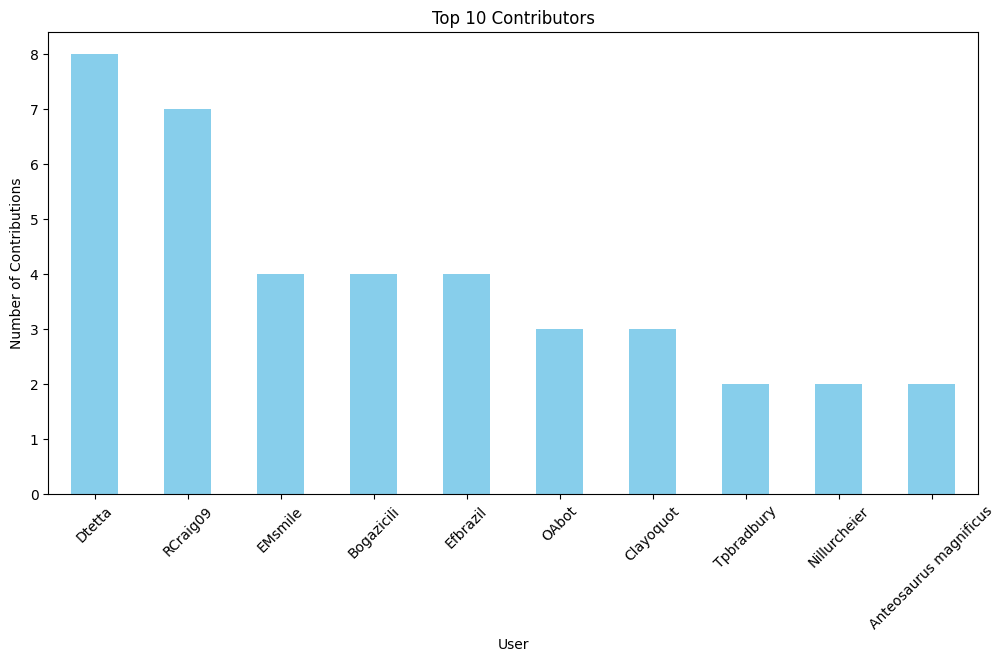

In [4]:

top_contributors = revision_data['user'].value_counts().head(10)  # Top 10 contributors

plt.figure(figsize=(12, 6))
top_contributors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Contributors')
plt.xlabel('User')
plt.ylabel('Number of Contributions')
plt.xticks(rotation=45)
plt.show()


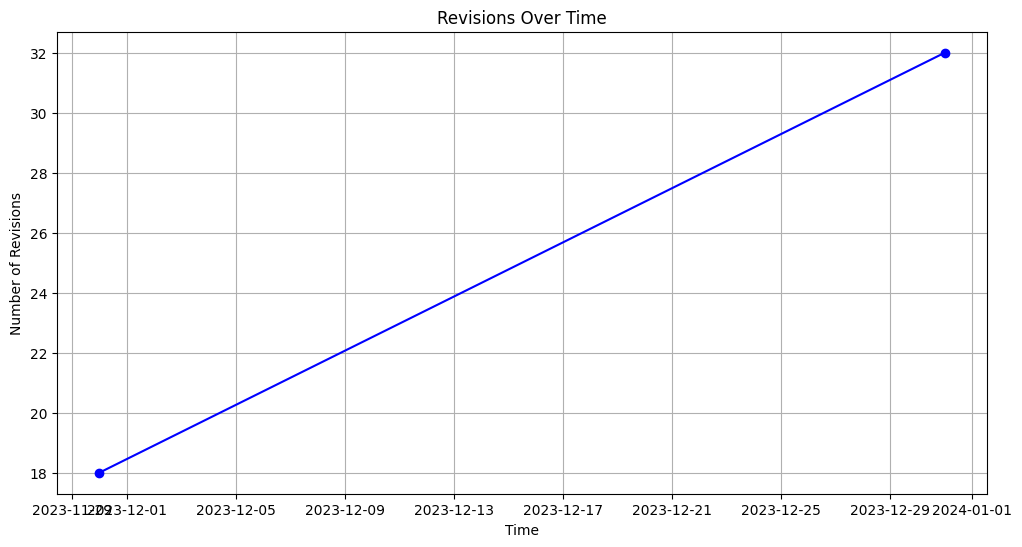

In [9]:
revision_data['timestamp'] = pd.to_datetime(revision_data['timestamp'])


# Set the timestamp as the index
revision_data.set_index('timestamp', inplace=True)

# Resample the data to a regular frequency, e.g., monthly ('M'), and count revisions
monthly_revisions = revision_data.resample('M').size()

# Create a histogram of edits by day
plt.figure(figsize=(12, 6))
plt.hist(revision_data.index.date, bins=30, color='skyblue', edgecolor='black')  # Adjust bins as necessary
plt.title('Distribution of Revisions')
plt.xlabel('Date')
plt.ylabel('Number of Revisions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()
